## Wine Quality Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
wine = pd.read_csv('winequality-red.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### About the columns:
    1. fixed acidity - This column shows that the level of acidity in the Wine.
    2. volatile acidity - It shows the amount of acids in the wine.
    3. citric acid - It shows the how much amount of citric acid present in the wine.
    4. residual sugar - This column tells that the how much amount of sugar added in wine.
    5. chlorides - It tells the amount of salt present in wine.
    6. free sulfur dioxide - It shows the amount of free sulfur dioxide present in wine.
    7. total sulfur dioxide - It shows the amount of total sulfur dioxide present in wine.
    8. density - It shows the density of wine.
    9. pH - It describes how acidic the wine is.
    10. sulphates - It tells the level of sulphate in wine.
    11. alcohol - It shows the percentage of alcohol present in wine.
    12. quality - This column shows the quality of a wine either it is good or bad.

In [4]:
wine.shape

(1599, 12)

 We have 1599 rows and 12 columns.

In [5]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is no null value in given dataset.

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


We can see the information about Wine dataset. It shows that is the dataset have any null values and the datatype, is the given data is catagorical,integer or float. It also shows the number rows and columns and how much memory the dataset used.

### Data Analysis and Visualization

#### Description

In [7]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


The discription of dataset shows the count,mean,standard deviation,minimum value,maximum value,25 percentile,50 percentile and 75 percentile of each column.

<function matplotlib.pyplot.show(close=None, block=None)>

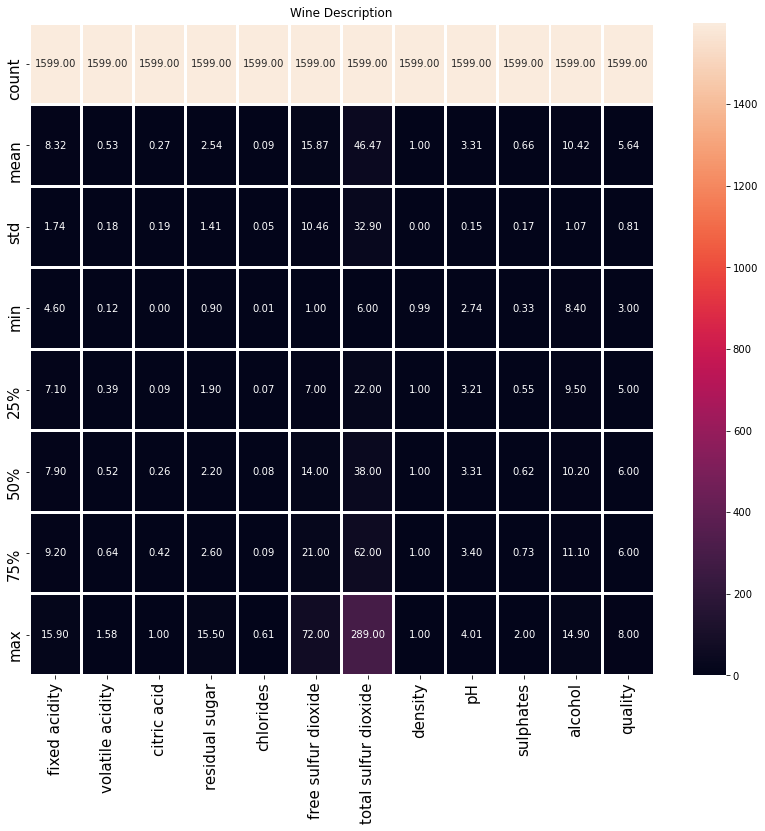

In [8]:
plt.figure(figsize=(14,12))
sns.heatmap(wine.describe(),annot=True,linewidths=2,fmt='.2f' )
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Wine Description')
plt.colormaps
plt.show

### Outcome of Description
  Description of Wine datset helps us to clean the data.
  
  Fixed Acidity - 1.Mean = 8.8, 2.Std = 1.7, 3.Min = 4.6, Max = 16
  
  Volatile Acidity - 1.Mean = 0.53, 2.Std = 0.18, 3.Min = o.12, Max = 1.6
  
  Citric Acid - 1.Mean = 0.27, 2.Std = 0.19, 3.Min = 0, Max = 1
  
  Residual Sugar - 1.Mean = 2.5, 2.Std = 1.4, 3.Min = 0.9, Max = 16
  
  Chlorides - 1.Mean = 0.087, 2.Std = 0.047, 3.Min = 0.012, Max = 0.16
  
  Free Sulphur Dioxide - 1.Mean = 16, 2.Std = 10, 3.Min = 1, Max = 72
  
  Total Sulphur Dioxide - 1.Mean = 46, 2.Std = 33, 3.Min = 6, Max = 2.9e+02
  
  Density - 1.Mean = 1, 2.Std = 0.0019, 3.Min = 0.99, Max = 1
  
  pH - 1.Mean = 3.3, 2.Std = 0.15, 3.Min = 2.7, Max = 4
  
  Sulphates - 1.Mean = 0.66, 2.Std = 0.17, 3.Min = 0.33, Max = 2
  
  Alcohol - 1.Mean = 10, 2.Std = 1.1, 3.Min = 8.4, Max = 15
  
  Quality - 1.Mean = 5.6, 2.Std = 0.81, 3.Min = 3, Max = 8

#### Correlation

In [9]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

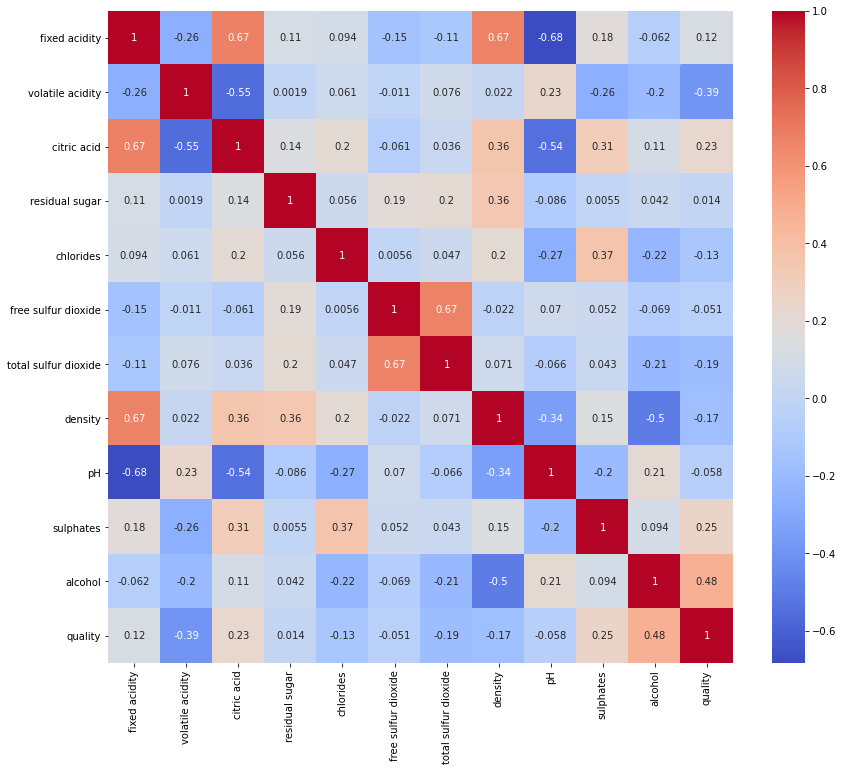

In [10]:
plt.figure(figsize=(14,12))
sns.heatmap(wine.corr(),annot=True,cmap='coolwarm')


### Outcome of Correlation

Fixed acidity,Alcohol,Sulphates,Residual Sugar and Citric Acid has the positive correlation with the Quality. Other column has the negative correlation with the Quality.

Alcohol has the 48 percent correlation with the Quality which consider to be the stron bond. Volatile Acidity has the 39 percent correlation with the Quality which is form a good bond. Sulphates and Citric Acid has 25 and 23 percenr resp. bond with the Quality.

Total sulphur dioxide and density has the 19 and 17 percent bond with the Quality resp. Chlorides and Fixed acidity has the 13 and 12 percent correlation with the Quality resp. 

In [11]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<Figure size 648x504 with 0 Axes>

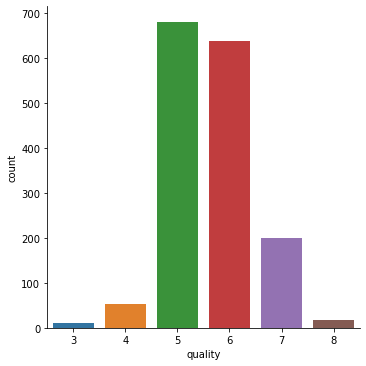

In [12]:
plt.figure(figsize=(9,7))
sns.catplot(x = 'quality',data = wine, kind = 'count')

From above barplot we can say that the 5th and 6th bar have good quality of wine. 7th and 8th bar have the higher quality of wine.

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

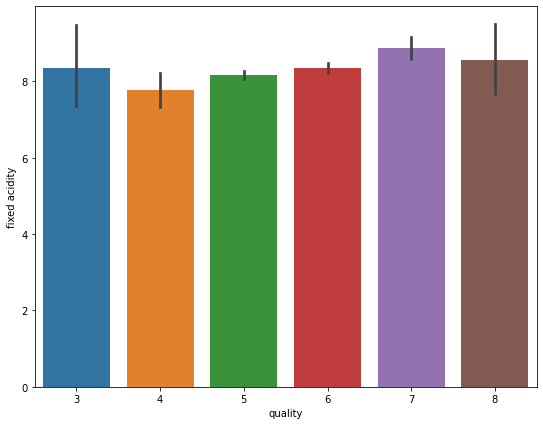

In [13]:
plt.figure(figsize=(9,7))
sns.barplot(x = 'quality', y = 'fixed acidity' ,data=wine)

From above barplot we can see that 7th bar has the higher quality of wine.

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

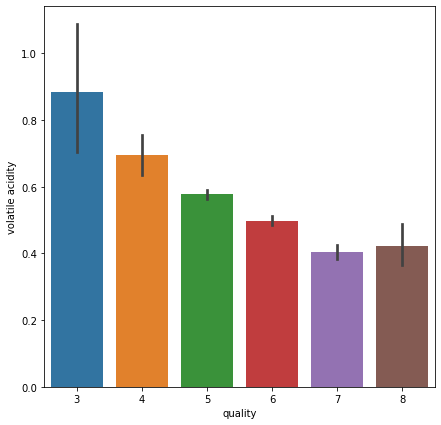

In [14]:
plt.figure(figsize=(7,7))
sns.barplot(x='quality',y='volatile acidity',data=wine)

Above plot tells that the quality and volatile acidity are inversely proportional to each other. If the value of volatile acidity increases, the value of quality decreases.

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

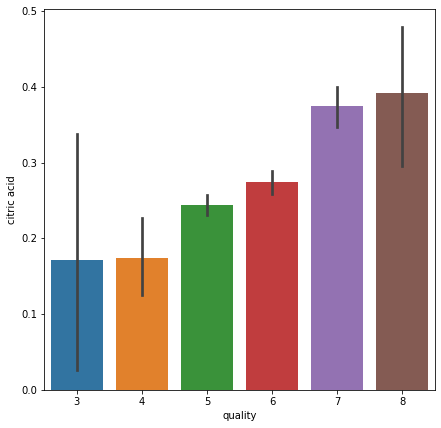

In [15]:
plt.figure(figsize=(7,7))
sns.barplot(x='quality',y='citric acid',data=wine)

As the amount of citric acid increases the quality of a wine increases.Quality and Citric acid are proportional to each other.

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

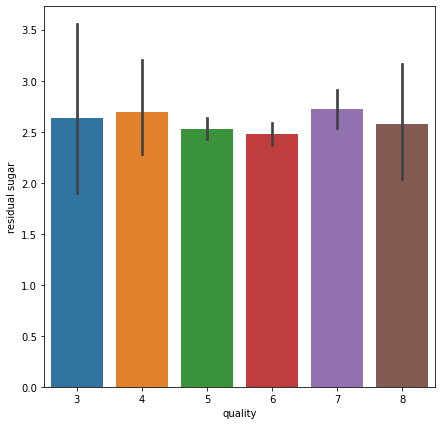

In [16]:
plt.figure(figsize=(7,7))
sns.barplot(x='quality',y='residual sugar',data=wine)

From above graph we can see that higher the residual sugar means higher the quality of wine.

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

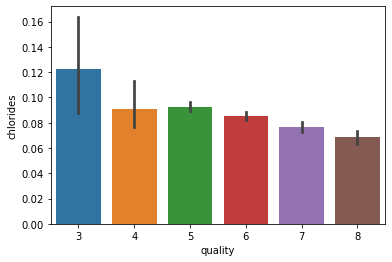

In [17]:
sns.barplot(x='quality',y='chlorides',data=wine)

As shown in above graph we can say that, higher the chlorides lower is the value of wine. Chlorides and Quality are inversely proportional to each other.

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

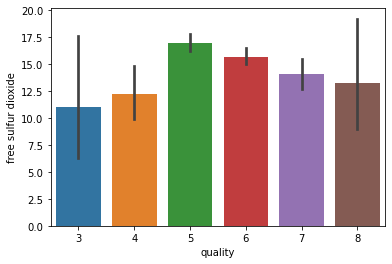

In [18]:
sns.barplot(x='quality',y='free sulfur dioxide',data=wine)

From above graph we seen that higher the value of free sulphur dioxide, lower is the quality of wine.

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

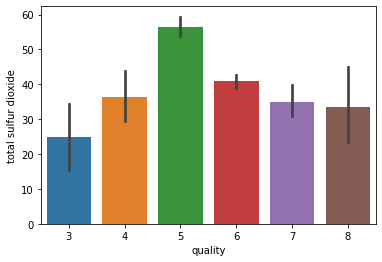

In [19]:
sns.barplot(x='quality',y='total sulfur dioxide',data=wine)

As above graph tells that lower the value of total sulphar dioxide,higher is the quality of wine.

<AxesSubplot:xlabel='quality', ylabel='density'>

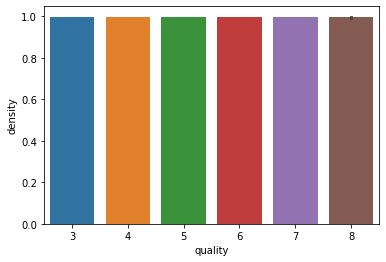

In [20]:
sns.barplot(x='quality',y='density',data=wine)

From above graph we can see that the value of density and the quality of wine are same for all the graphs.

<AxesSubplot:xlabel='quality', ylabel='pH'>

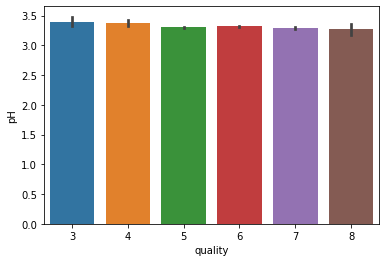

In [21]:
sns.barplot(x='quality',y='pH',data=wine)

Above graph shows that lower the value of pH,lower the quality of wine means we can see that pH and wine are directly proportional to each other.

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

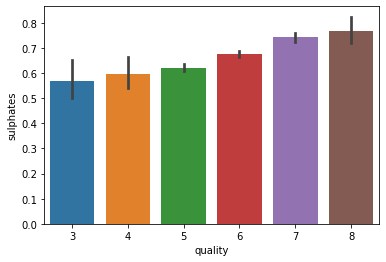

In [22]:
sns.barplot(x='quality',y='sulphates',data=wine)

From above graph we can see that higher the value of sulphates, higher the quality of wine. 

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

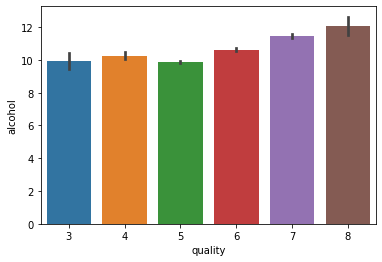

In [23]:
sns.barplot(x='quality',y='alcohol',data=wine)

Above graph tells that higher the percentage of alcohol means higher is the quality of wine. 

### Splitting the Independent and Target variables in x any y

In [24]:
x = wine.drop("quality",axis=1)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [25]:
y = wine["quality"]
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

### Skewness

In [26]:
wine.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

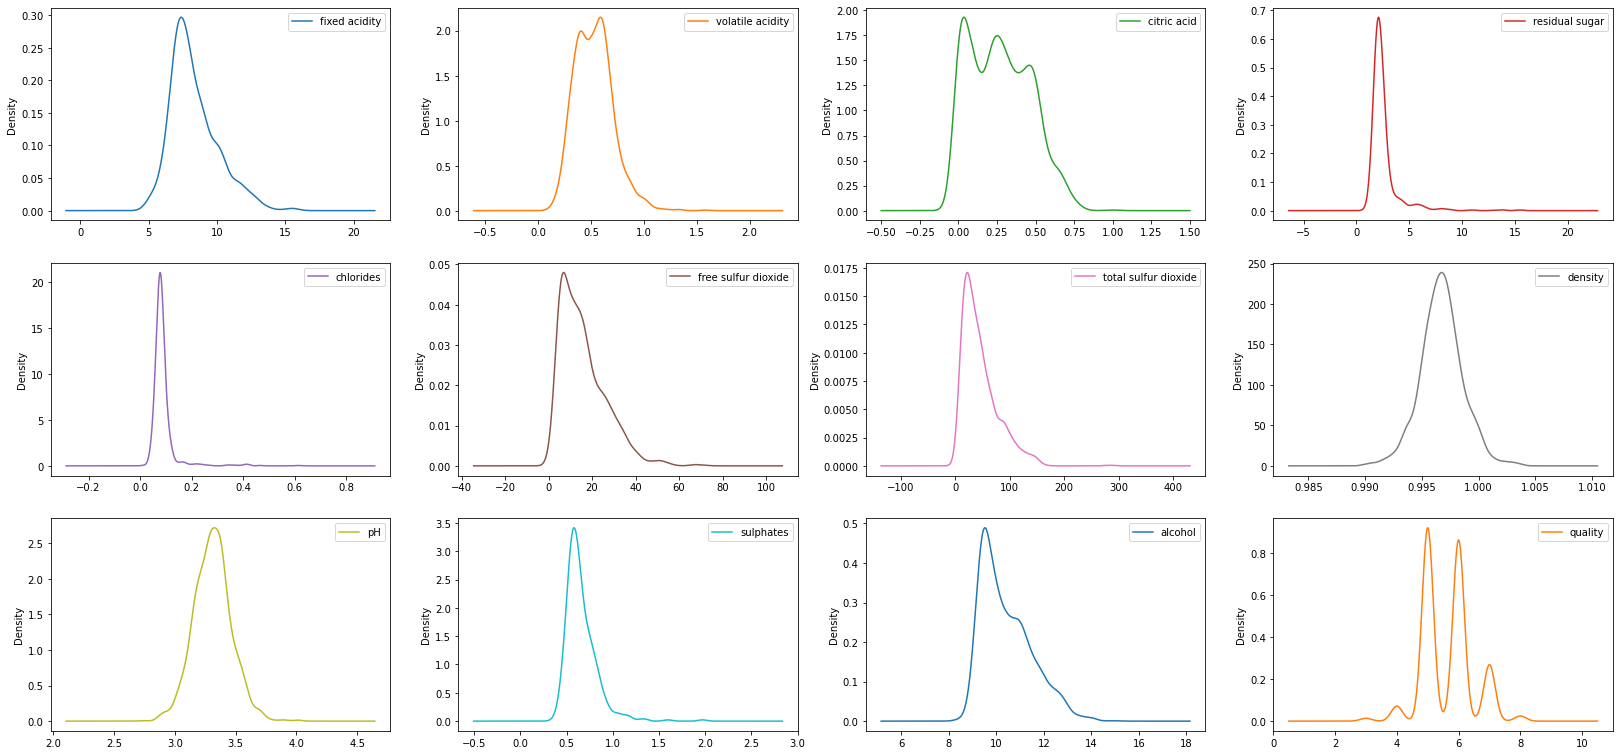

In [27]:
wine.plot(kind = 'density',subplots = True,layout =(4,4) ,figsize=(28,18),sharex=False)
plt.show()

We can see skewness in data for multiple columns.

In [28]:
x.skew().sort_values(ascending=False)

chlorides               5.680347
residual sugar          4.540655
sulphates               2.428672
total sulfur dioxide    1.515531
free sulfur dioxide     1.250567
fixed acidity           0.982751
alcohol                 0.860829
volatile acidity        0.671593
citric acid             0.318337
pH                      0.193683
density                 0.071288
dtype: float64

We can see the skewness of columns in descending order. Chlorides have the highest skewness and density has the lowest skewness.

In [29]:
from sklearn.preprocessing import power_transform
x1 = power_transform(x)

In [30]:
type(x1)

numpy.ndarray

In [31]:
x.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [32]:
x = pd.DataFrame(x1,columns=x.columns)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025
1,-0.161308,1.771299,-1.531109,0.556565,0.786204,0.993852,0.854954,0.036967,-0.709517,0.395140,-0.500860
2,-0.161308,1.269801,-1.255359,0.152372,0.560696,0.193450,0.540394,0.142851,-0.310054,0.183772,-0.500860
3,1.522582,-1.550050,1.398471,-0.597145,-0.226113,0.385115,0.693699,0.669354,-0.980154,-0.392318,-0.500860
4,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.461202,0.497996,-0.993315,-0.380998,0.480036,1.397043,0.244351,-0.978746,0.906172,-0.392318,0.292864
1595,-1.767458,0.227895,-0.867068,-0.008632,-1.013159,1.727353,0.457504,-0.860223,1.336627,0.874884,0.888124
1596,-1.364367,0.000387,-0.683294,0.152372,-0.172896,1.235044,0.107498,-0.527497,0.718869,0.820841,0.734558
1597,-1.767458,0.728553,-0.743826,-0.380998,-0.226113,1.397043,0.244351,-0.672160,1.638595,0.588344,-0.018800


In [33]:
x.skew().sort_values(ascending=False)

alcohol                 0.112372
citric acid             0.017788
sulphates               0.009985
volatile acidity        0.003099
fixed acidity           0.002529
pH                     -0.002823
total sulfur dioxide   -0.003752
density                -0.005054
free sulfur dioxide    -0.009948
residual sugar         -0.015715
chlorides              -0.151304
dtype: float64

In [34]:
sk = x.skew()
sk

fixed acidity           0.002529
volatile acidity        0.003099
citric acid             0.017788
residual sugar         -0.015715
chlorides              -0.151304
free sulfur dioxide    -0.009948
total sulfur dioxide   -0.003752
density                -0.005054
pH                     -0.002823
sulphates               0.009985
alcohol                 0.112372
dtype: float64

In [35]:
#np.abs function converts all the negative values into positive.
x.skew()[np.abs(x.skew()<0.25)].all()

True

We remove the skewness from all the columns by using the power transform.

### Checking Outliers

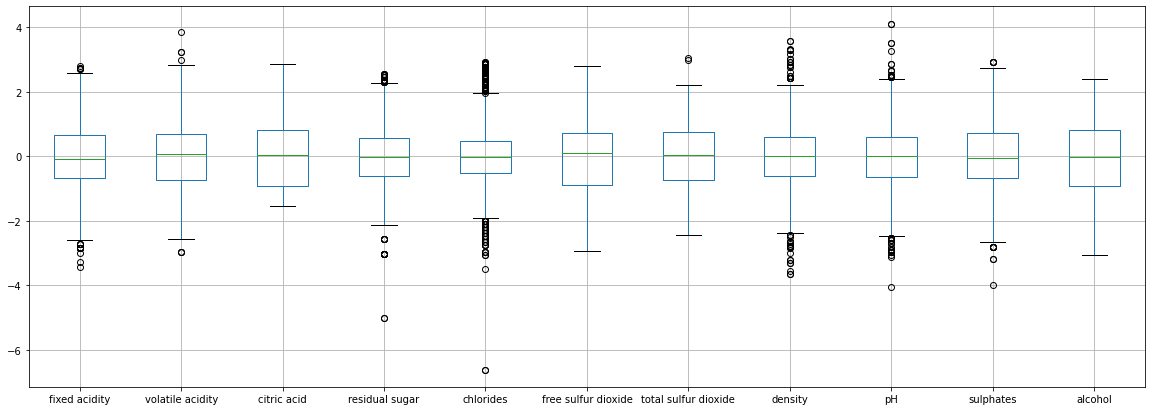

In [36]:
x.boxplot(figsize=(20,7))
plt.subplots
plt.show()

From the above boxplot we can see that, Density,Chlorides and pH have the highest number of outliers. Fixed Acidity,Residual Sugar and Sulphates have more number of outliers.

Volatile Acidity and Total Sulphur dioxide have less number of outliers. Citric Acid,Free Sulphur dioxide and Alcohol have no outliers.

### Removing Outliers

#### Z Score Technique

In [37]:
from scipy.stats import zscore
z = np.abs(zscore(wine))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.78782264],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.78782264],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.78782264],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.45084835],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.78782264],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.45084835]])

In [38]:
Threshold = 3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [39]:

red = wine[(z<3).all(axis=1)]
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


After removing the outliers and skewness from dataset we have got the new dataset with 1451 rows and 12 columns.

In [40]:
print(wine.shape)
print(red.shape)

(1599, 12)
(1451, 12)


In [41]:
x = red.iloc[:,:-1]
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [42]:
y = red['quality'] 
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1451, dtype: int64

We split the independent and target value into x and y.

#### Label Binarization

In [43]:
y = red['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [44]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1451, dtype: int64


By using the label binarization we convert the quality values into binary format.

In [45]:
x.shape

(1451, 11)

In [46]:
y.shape

(1451,)

### Training Process

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

#### Best Random State

In [48]:
maxAccu = 0
maxRS = 0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred_train = LR.predict(x_train)
    pred_test = LR.predict(x_test)
    acc_train = accuracy_score(y_train,pred_train)
    acc_test = accuracy_score(y_test,pred_test)
    print('training accuracy :',acc_train,'test accuracy is :',acc_test,'random_state is:',i)
    print()
    
    #training accuracy : 0.6029556650246305 test accuracy is : 0.6009174311926605 random_state is: 85






training accuracy : 0.896551724137931 test accuracy is : 0.8853211009174312 random_state is: 1

training accuracy : 0.8916256157635468 test accuracy is : 0.8876146788990825 random_state is: 2

training accuracy : 0.8827586206896552 test accuracy is : 0.8967889908256881 random_state is: 3

training accuracy : 0.8817733990147784 test accuracy is : 0.8761467889908257 random_state is: 4

training accuracy : 0.8935960591133005 test accuracy is : 0.8623853211009175 random_state is: 5

training accuracy : 0.8886699507389163 test accuracy is : 0.8646788990825688 random_state is: 6

training accuracy : 0.8906403940886699 test accuracy is : 0.8830275229357798 random_state is: 7

training accuracy : 0.8916256157635468 test accuracy is : 0.8692660550458715 random_state is: 8

training accuracy : 0.8866995073891626 test accuracy is : 0.8899082568807339 random_state is: 9

training accuracy : 0.8916256157635468 test accuracy is : 0.8922018348623854 random_state is: 10

training accuracy : 0.88374384

        We have found the best random_state value 85.Now we create train_test_split using this random state

#### Train-Test split

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=85)

In [50]:
x_train.shape

(1088, 11)

In [51]:
x_test.shape

(363, 11)

In [52]:
y_train.shape

(1088,)

In [53]:
y_test.shape

(363,)

### Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train,y_train)
pred_test = LR.predict(x_test)
print('Accuracy',accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

Accuracy 0.8787878787878788
[[306  10]
 [ 34  13]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       316
           1       0.57      0.28      0.37        47

    accuracy                           0.88       363
   macro avg       0.73      0.62      0.65       363
weighted avg       0.86      0.88      0.86       363



### Decision Tree Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print('Accuracy',accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 0.8732782369146006
[[285  31]
 [ 15  32]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       316
           1       0.51      0.68      0.58        47

    accuracy                           0.87       363
   macro avg       0.73      0.79      0.75       363
weighted avg       0.89      0.87      0.88       363



### Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)
print('Accuracy',accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

Accuracy 0.9228650137741047
[[309   7]
 [ 21  26]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       316
           1       0.79      0.55      0.65        47

    accuracy                           0.92       363
   macro avg       0.86      0.77      0.80       363
weighted avg       0.92      0.92      0.92       363



### SVC

In [57]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print('Accuracy',accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy 0.8705234159779615
[[316   0]
 [ 47   0]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       316
           1       0.00      0.00      0.00        47

    accuracy                           0.87       363
   macro avg       0.44      0.50      0.47       363
weighted avg       0.76      0.87      0.81       363



### Extra Tree Classifier

In [58]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x_train,y_train)
predetc = etc.predict(x_test)
print('Accuracy',accuracy_score(y_test,predetc))
print(confusion_matrix(y_test,predetc))
print(classification_report(y_test,predetc))

Accuracy 0.90633608815427
[[305  11]
 [ 23  24]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       316
           1       0.69      0.51      0.59        47

    accuracy                           0.91       363
   macro avg       0.81      0.74      0.77       363
weighted avg       0.90      0.91      0.90       363



We test the different model as shown above. From model testing we can see that Random forest classifier and Extra tree classifier have same percentage of accuracy 92. 

Logistic regression,Decision tree classifier SVC producing a good accuracy.

Now we have to check cross validation.

### Cross Validation

In [59]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(LR,x,y,cv=5)
print('Cross validation score of Logistic Regression model:',scr.mean())

Cross validation score of Logistic Regression model: 0.8780116127503259


In [60]:
scr1 = cross_val_score(dt,x,y,cv=5)
print('Cross validation score of Decision tree classifier model:',scr1.mean())

Cross validation score of Decision tree classifier model: 0.800101907808982


In [61]:
scr2 = cross_val_score(rfc,x,y,cv=5)
print('Cross validation score of Random forest classifier model:',scr2.mean())

Cross validation score of Random forest classifier model: 0.8793885531461072


In [62]:
scr3 = cross_val_score(svc,x,y,cv=5)
print('Cross validation score of SVC model:',scr3.mean())

Cross validation score of SVC model: 0.8614764782557174


In [63]:
scr4 = cross_val_score(etc,x,y,cv=5)
print('Cross validation score of Extra tree classifier model:',scr4.mean())

Cross validation score of Extra tree classifier model: 0.8718023462495557


Cross validation score of Logistic Regression is 87.80 and for Random forest classifier it is 87.52. So we will continue with LogisticRegression.

### Hyper parameter tuning

In [64]:
LogisticRegression()

LogisticRegression()

In [65]:
from sklearn.model_selection import GridSearchCV
parameters = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
             'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             'multi_class' : ['auto', 'ovr', 'multinomial']}

In [66]:
GCV = GridSearchCV(LogisticRegression(),parameters,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'multi_class': 'auto', 'penalty': 'none', 'solver': 'lbfgs'}

In [67]:
GCV_pred = GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8787878787878788

### ROC AUC Plot

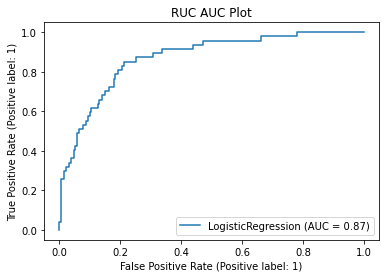

In [68]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title('RUC AUC Plot')
plt.show()

Final accuracy is 88% and AUC score is 88% which is good.

### Saving the Model

In [69]:
import joblib
joblib.dump(GCV.best_estimator_,"RedWine.pkl")

['RedWine.pkl']

#### Saved the model.